In [2]:
import numpy as np
import pandas as pd


In [3]:
run_dir = "../runs"
split = "test"
z_dims = [8,16,32,64,128,256,512]
ks =[5,10,15,20,25,30,35,40,50,60,80]

estimates = []
for dim in z_dims:
    path = f"{run_dir}/celeba_z{dim}/knn_mle/z{dim}_id_{split}_raw.npz"
    with np.load(path) as f:
        estimates.append(f["id_estimate"])

all_ids = np.column_stack(estimates)


df = pd.DataFrame(
    all_ids,
    index=ks,
    columns=z_dims,
)

df.index.name = "k"
df.columns.name = "z_dim"

df

z_dim,8,16,32,64,128,256,512
k,,,,,,,
5,10.162742,15.936810,23.626218,32.609184,40.415439,43.110912,42.119809
10,8.596875,13.197288,19.360587,26.159088,32.826411,35.000603,34.296088
15,8.220182,12.424539,18.090652,24.307456,30.489905,32.543726,32.006205
20,8.012586,11.985368,17.384026,23.258023,29.190979,31.143719,30.848243
25,7.912816,11.678389,16.886881,22.546179,28.321543,30.157894,30.038856
30,7.836893,11.431348,16.493541,21.967149,27.615510,29.377120,29.414109
35,7.779270,11.240419,16.188214,21.512537,27.044397,28.754618,28.841037
40,7.727814,11.087135,15.898899,21.139038,26.555714,28.226321,28.417142
50,7.656789,10.805552,15.434029,20.470344,25.718991,27.332926,27.640820


<Axes: xlabel='k'>

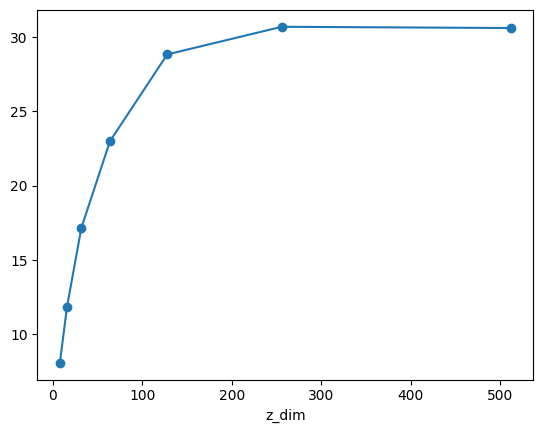

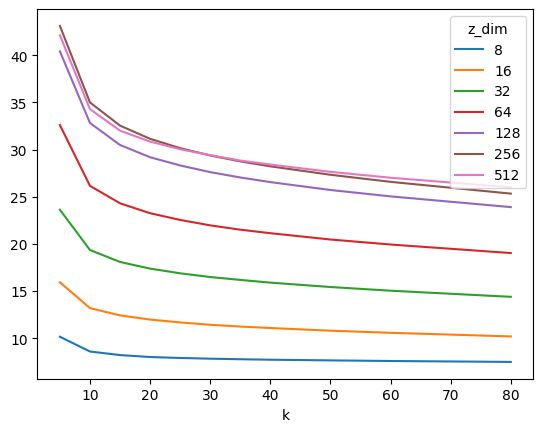

In [4]:
df.mean()
df.mean().plot(marker="o")
df.plot()

In [5]:
# z_dims must be sorted
z = np.array(z_dims)              # [8,16,32,64,128,256, ]
y = df.mean().values              # mean ID per z_dim

# First and second discrete derivatives
dy  = np.gradient(y, z)
d2y = np.gradient(dy, z)

# Knee = max curvature (largest magnitude 2nd deriv)
knee_idx = np.argmax(np.abs(d2y))
knee_z = z[knee_idx]

print("Knee at z_dim =", knee_z)

Knee at z_dim = 32
